### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


### Findings
```
    Most are categorical columns.
    Even the numericals ones are encoded ( Yes / No ) types
    Only temperature is the real numerical value

```

2. Investigate the dataset for missing or problematic data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

### Findings
```
    There are 8 numerical columns and 18 categorical columns.
    The dataset has 12,684 rows
```

```
    Checking for null values on all columns
```

In [5]:
data.isnull().sum().sort_values(ascending=False)/len(data)

car                     0.991485
CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
destination             0.000000
passanger               0.000000
direction_opp           0.000000
direction_same          0.000000
toCoupon_GEQ25min       0.000000
toCoupon_GEQ15min       0.000000
toCoupon_GEQ5min        0.000000
income                  0.000000
occupation              0.000000
education               0.000000
has_children            0.000000
maritalStatus           0.000000
age                     0.000000
gender                  0.000000
expiration              0.000000
coupon                  0.000000
time                    0.000000
temperature             0.000000
weather                 0.000000
Y                       0.000000
dtype: float64

### Findings
```
    99% of 'car' (type of car driven) is missing values.
    There are 5 other columns missing about 1%
```

3. Decide what to do about your missing data -- drop, replace, other...

### Cleanup
```
    Drop the 'car' column
    Replace 1% missing value columns with, frequently occuring 
    (statistical mode) values
```

In [6]:
def replaceFrequent(col):
    return data[col].fillna(data[col].value_counts().index[0])

data['Bar'] = replaceFrequent('Bar')
data['CoffeeHouse'] = replaceFrequent('CoffeeHouse')
data['Restaurant20To50'] = replaceFrequent('Restaurant20To50')
data['CarryAway'] = replaceFrequent('CarryAway')
data['RestaurantLessThan20'] = replaceFrequent('RestaurantLessThan20')                           

data.drop('car', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12684 non-null  object
 15  CoffeeHouse           12684 non-null

### Data Cleaning
```
    Check for duplicate rows and just keep one
    74 (about .6%) dups were found
    Since % dups is insignificant drop them

```

In [7]:
dups= data[data.duplicated(keep = 'first')]
print(f'Num dups: {dups.shape[0]}  % dups: {100*(dups.shape[0]/data.shape[0]):.2}%')


Num dups: 74  % dups: 0.58%


```
     Drop duplicates
```

In [8]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null

### Data cleanup
```
        Drop rows with NaN
```

In [9]:
data.dropna(inplace=True)
data.shape

(12610, 25)

### Findings
```
    After cleanup we endup with 12,610 rows and 25 columns

```

4. What proportion of the total observations chose to accept the coupon? 



In [10]:
coupon_counts = data.groupby('Y').Y.count()/data.shape[0]
print(f'Chose to reject coupons: {coupon_counts[0]*data.shape[0]}   %: {100*coupon_counts[0]:.1f}')
print(f'Chose to accept coupons: {coupon_counts[1]*data.shape[0]}   %: {100*coupon_counts[1]:.1f}')

Chose to reject coupons: 5453.0   %: 43.2
Chose to accept coupons: 7157.0   %: 56.8


### Findings
56.9% chose to accept the coupon. 

5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Coupon types by %'}, xlabel='Coupon Type', ylabel='%'>

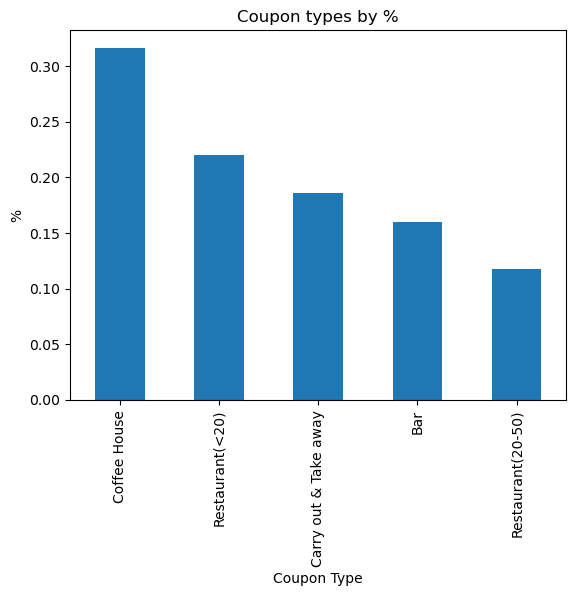

In [11]:
(data['coupon'].value_counts()/data.shape[0]).plot(kind='bar', title='Coupon types by %',
                                                   xlabel='Coupon Type',
                                                   ylabel='%')

### Findings
```
    Coffee house (32%) and restaurants (22%) make up about 
    half of the coupon types delivered.
```

6. Use a histogram to visualize the temperature column.

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

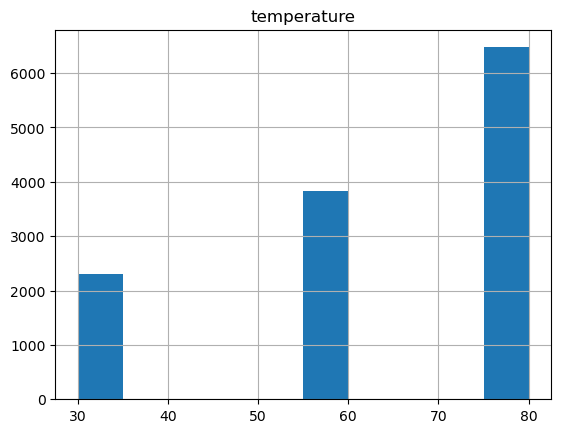

In [12]:
data.hist(column='temperature')

### Findings
```
    Only 3 unique values of temperatures where found. 
    About 50% of temperature values where sunny: 80F

```

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
data_bar = data.query('coupon == "Bar"')
data_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [14]:
bar_coupons_accepted = data_bar.query('Y == 1').value_counts().shape[0]
print(f'Total bar coupons:      {data_bar.shape[0]}')
print(f'Bar coupons accepted:   {bar_coupons_accepted}  percent: {(bar_coupons_accepted/data_bar.shape[0])*100:.1f}%')

Total bar coupons:      2010
Bar coupons accepted:   824  percent: 41.0%


### Findings 
```
    41% of bar coupons delivered were accepted.
```

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [15]:
data_bar.Bar.unique()

array(['never', 'less1', '1~3', 'gt8', '4~8'], dtype=object)

In [16]:
upto_3 = data_bar.query(' (Y==1) and (Bar in ["never", "less1", "1~3"]) ').shape[0]
morethan_3 = data_bar.query(' (Y==1) and (Bar in ["gt8", "4~8"]) ').shape[0]
print(f'Total bar coupons:                  {data_bar.shape[0]}')
print(f'Bar coupons accepted:               {bar_coupons_accepted}      percent: {(bar_coupons_accepted/data_bar.shape[0])*100:.1f}%')
print(f'<= 3 bar visits acceptance - total: {upto_3}      proportion: {(upto_3/bar_coupons_accepted)*100:.1f}')
print(f'>3 bar visits acceptance - total:   {morethan_3}      proportion: {(morethan_3/bar_coupons_accepted)*100:.1f}')


Total bar coupons:                  2010
Bar coupons accepted:               824      percent: 41.0%
<= 3 bar visits acceptance - total: 671      proportion: 81.4
>3 bar visits acceptance - total:   153      proportion: 18.6


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:

driver_1m25age_over = data_bar.query(' (Y==1) and (age not in ["21", "below21"] ) \
                                     and (Bar in ["1~3", "gt8", "4~8"]) ').shape[0]
all_others = bar_coupons_accepted - driver_1m25age_over
print(f'Total bar coupons:              {data_bar.shape[0]}')
print(f'Bar coupons accepted:           {bar_coupons_accepted}  percent: {(bar_coupons_accepted/data_bar.shape[0])*100:.1f}%')
print(f'>1m age>25, accepted- total:    {driver_1m25age_over}  proportion: {(driver_1m25age_over/bar_coupons_accepted)*100:.1f}')
print(f'All others, accepted:           {all_others}  proportion: {(all_others/bar_coupons_accepted)*100:.1f}')


Total bar coupons:              2010
Bar coupons accepted:           824  percent: 41.0%
>1m age>25, accepted- total:    292  proportion: 35.4
All others, accepted:           532  proportion: 64.6


In [18]:
data_bar.passanger.unique()

array(['Kid(s)', 'Alone', 'Friend(s)', 'Partner'], dtype=object)

### Findings
```
    Drivers over the age of 25, who visited the bar more than once a month, 
    acceptance proportion was 35% (292/811)
    This category has significant acceptance rate.
```

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [19]:

drv_nok_occ= data_bar.query('(Y==1) and (passanger not in ["Kid\(s\)", "Alone"] ) \
                            and (Bar in ["1~3", "gt8", "4~8"]) and \
                             (occupation not in ["Farming Fishing & Forestry"])').shape[0]
all_rest = bar_coupons_accepted - drv_nok_occ
print(f'Total bar coupons:                      {data_bar.shape[0]}')
print(f'Bar coupons accepted:                   {bar_coupons_accepted}          percent: {(bar_coupons_accepted/data_bar.shape[0])*100:.1f}%')
print(f'>1m/no kid/occupation accepted- total:  {drv_nok_occ}          proportion: {(drv_nok_occ/bar_coupons_accepted)*100:.1f}')
print(f'All others, accepted:                   {all_rest}          proportion: {(all_rest/bar_coupons_accepted)*100:.1f}')





Total bar coupons:                      2010
Bar coupons accepted:                   824          percent: 41.0%
>1m/no kid/occupation accepted- total:  157          proportion: 19.1
All others, accepted:                   667          proportion: 80.9


### Findings
```
    Acceptance rate for drivers going to bar more than once a month, 
        had passengers other than kids and
        occupation other than farming, fishing or forestery acceptance rate was 19%.

    Most likely when adults driving in groups (other than kids), due to interesting
    conversations, delivered coupons may be ignored.

    Farming, Fishery and Forestry jobs require early rising and hard labor, 
    so the drivers may be too tired to notice the delivered coupons.

```

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [20]:
def rate_of_acceptance(num, total):
    return (num/total)*100


total_accepted_coupons = data.query('Y == 1').shape[0]
plus_1m_bar_no_kid_not_widow = data.query( '(Y == 1) and \
                                          (passanger not in ["Kid\(s\)", "Alone"] ) \
                                           and (Bar in ["1~3", "gt8", "4~8"]) \
                                          and (maritalStatus not in ["Widowed"])').shape[0]
plus_1m_bar_age_less_30 = data.query( '(Y == 1) and \
                                     (Bar in ["1~3", "gt8", "4~8"]) \
                                     and (age in ["26", "21"])').shape[0]
restaurant_4_income_less_50k = data.query( '(Y == 1) and \
                                           ( RestaurantLessThan20 in ["4~8", "gt8"])\
                                          and (income in ["$37500 - $49999"])').shape[0]

print(f'Total drivers:                          {data.shape[0]}')
print(f'Percent accepted coupons:               total: {total_accepted_coupons}         percent:{rate_of_acceptance(total_accepted_coupons, data.shape[0]):.1f}')
print(f'>1m, !kids, !widow accepted coupons:    total: {plus_1m_bar_no_kid_not_widow}       proportion:{rate_of_acceptance(plus_1m_bar_no_kid_not_widow, total_accepted_coupons):.1f}')
print(f'>1m, age<30 accepted coupons:           total: {plus_1m_bar_age_less_30}       proportion:{rate_of_acceptance(plus_1m_bar_age_less_30, total_accepted_coupons):.1f}')
print(f'>4rest, income<50k accepted coupons:    total: {restaurant_4_income_less_50k}       proportion:{rate_of_acceptance(restaurant_4_income_less_50k, total_accepted_coupons):.1f}')





Total drivers:                          12610
Percent accepted coupons:               total: 7157         percent:56.8
>1m, !kids, !widow accepted coupons:    total: 1098       proportion:15.3
>1m, age<30 accepted coupons:           total: 1382       proportion:19.3
>4rest, income<50k accepted coupons:    total: 412       proportion:5.8


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Findings
```
   :  Adults less than 30 year old, who go to bars frequently accept coupons 19% of time.
   :  Adults driving in groups, who are not widowed and go to bar frequently accept coupons
        about 15% of the time.

    We can hypothesize both these groups have a set pattern of frequenting bars (social activity) and leverage coupons to take advantage.

   :  Drivers who have relatively less income, frequent resting costing less than $20, only accept
      bar coupons 5% of the time.

   We can hypothesize that due to low income, they may not frequent bars as much and also may not
   be willing to pay higher price for their preferred drink as against to buying it in the
   liquor stores.

   In summary, drivers who visited the bars 3 or fewer times ( never, less than 1, 1 - 3 times) accepted the coupons 81% of the time.  We can hypothesize, that the coupons motivated them to accept it, in the hope of visiting the bar in the future. These drivers may not be habitual bar visitors and only plan to visit, if a coupon is available. So if the coupon offer substantial discount, these infrequent drivers may chose to visit the bar.
```

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

### Investigation
```
    The coupon group "Coffee House" wil be explored and the passenger characteristics of 
    the most coupon acceptance will be determined.

    Most people drink coffee or take coffee breaks at a set time.
    So the counts of coupon acceptance by 'time' against various 
        categorical attributes is plotted

```

<Axes: xlabel='occupation', ylabel='count'>

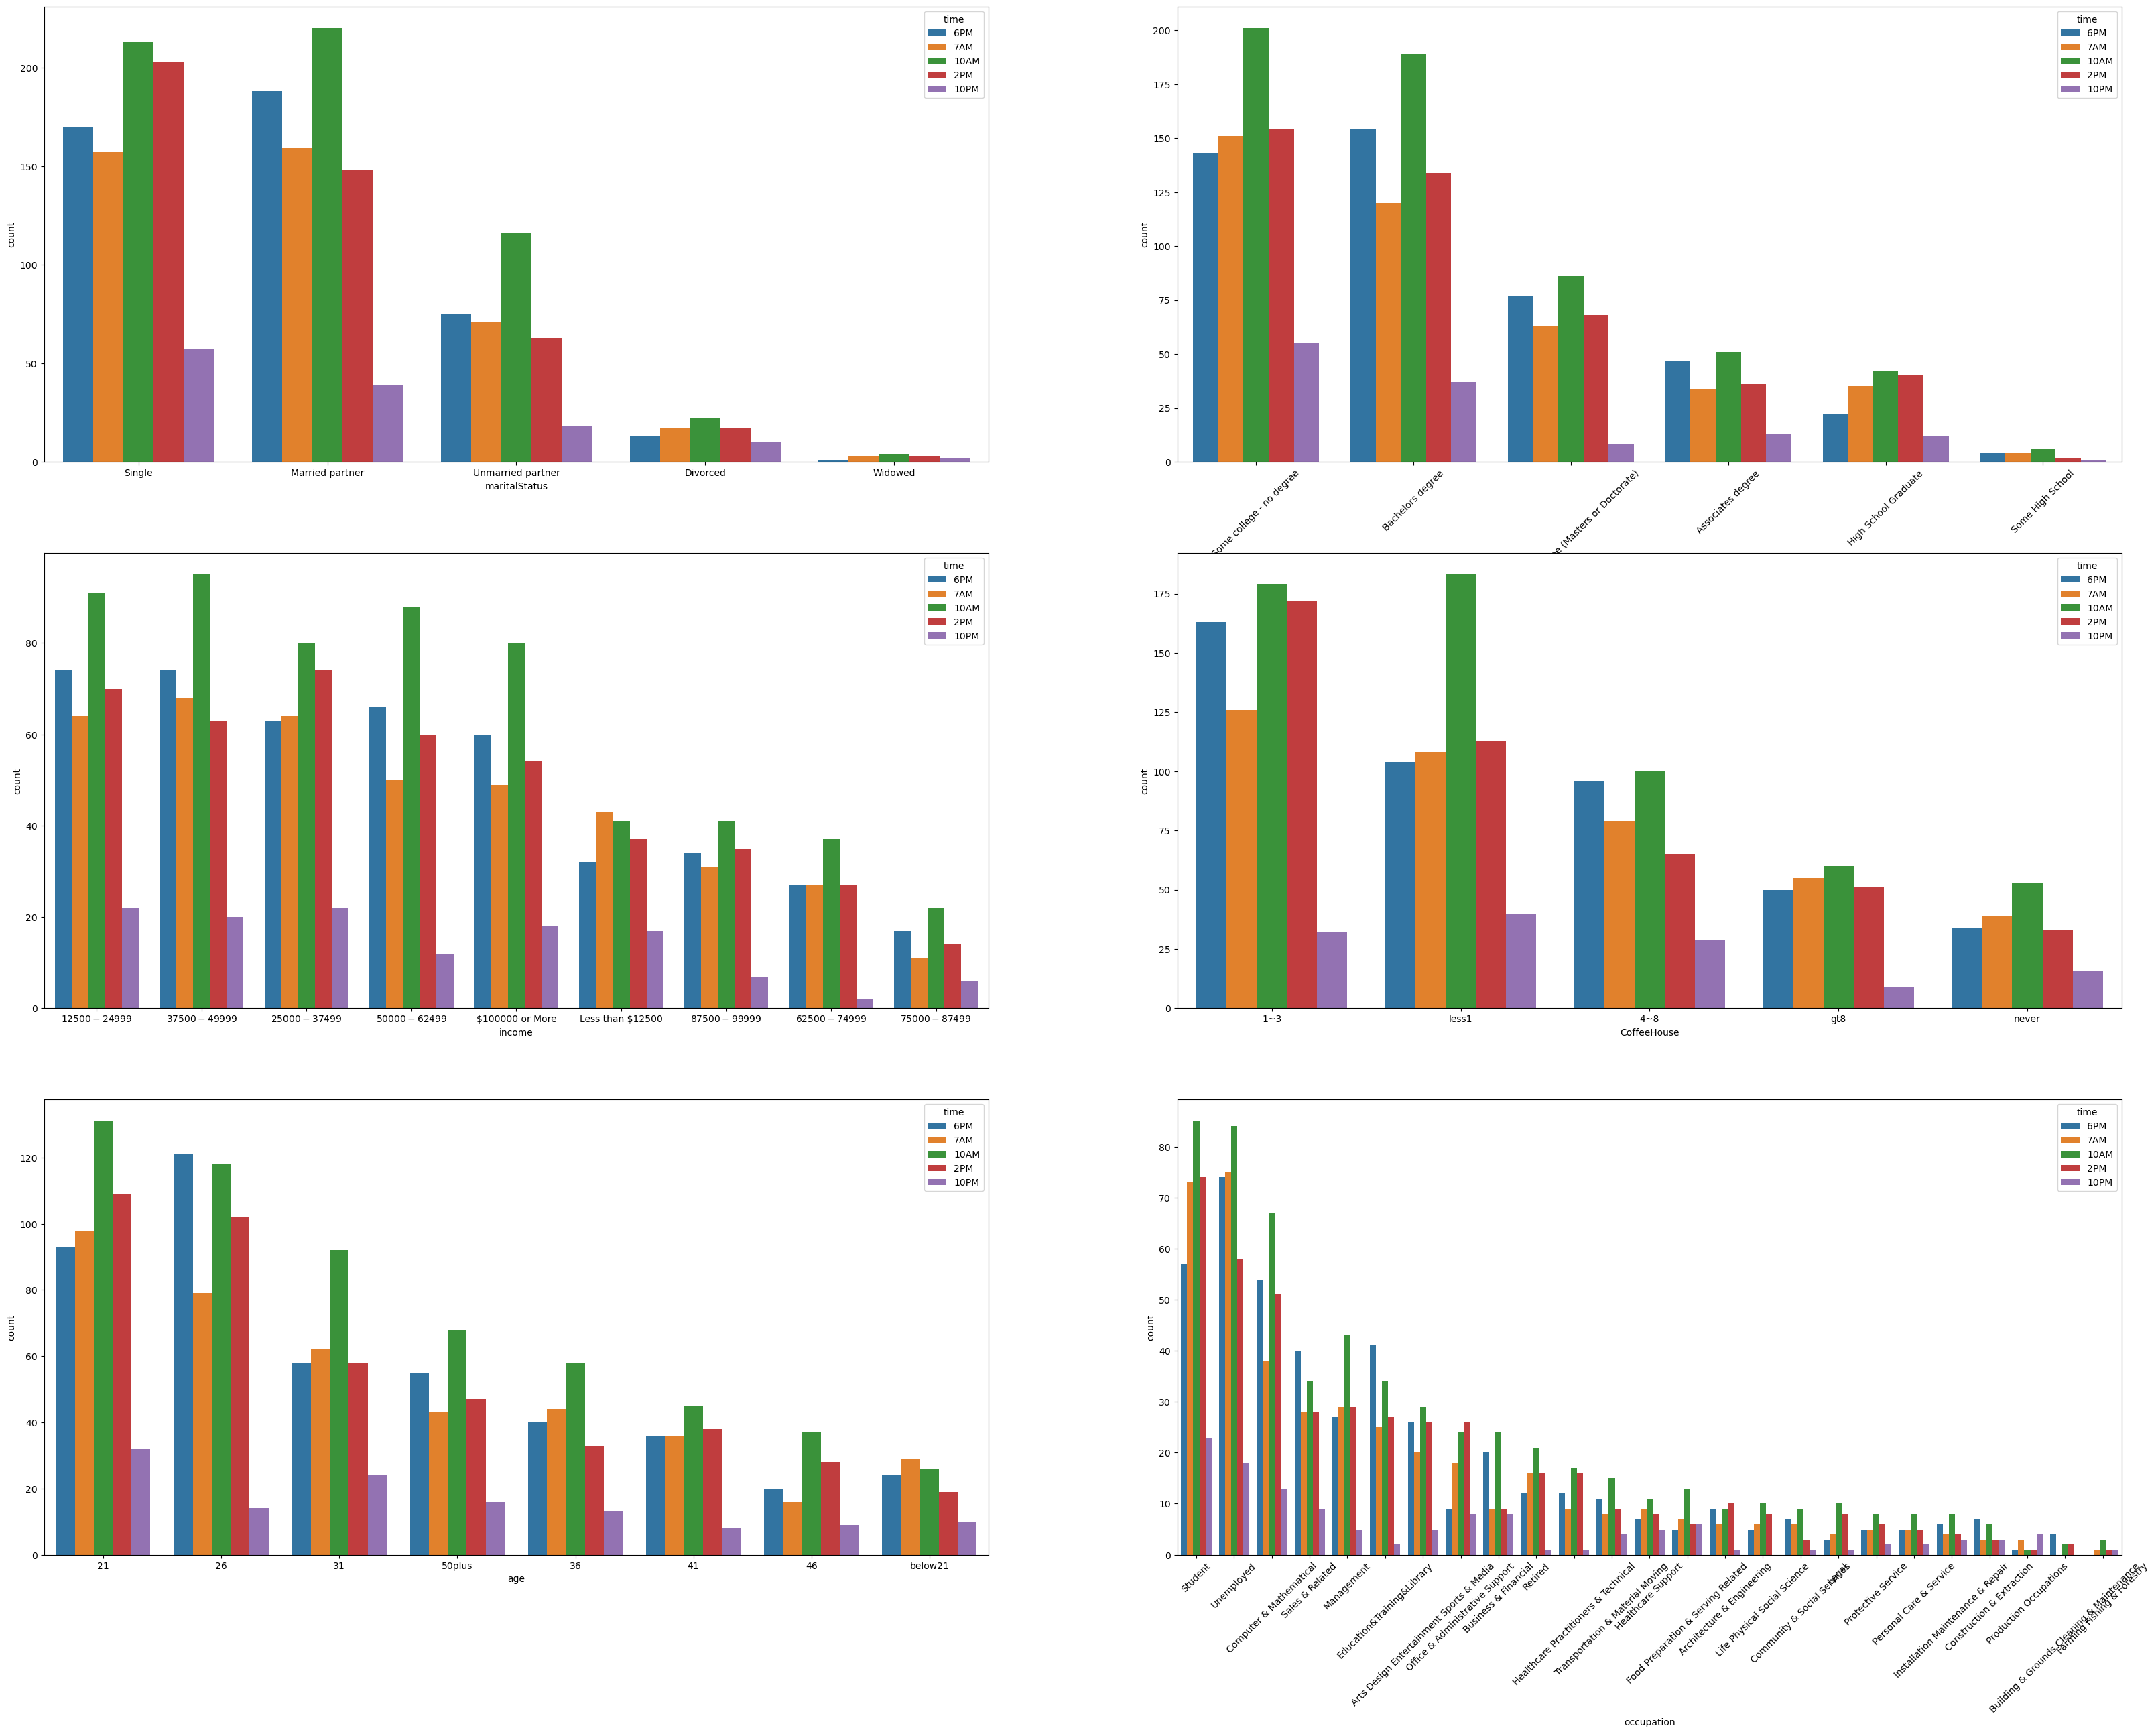

In [21]:

fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(40, 30))

df_coffee = data.query('(coupon == "Coffee House") and (Y == 1)')
sns.countplot(df_coffee, x='maritalStatus', hue='time', ax=axes[0][0], \
              order = df_coffee['maritalStatus'].value_counts().index)
axes[0][1].tick_params(axis='x', rotation=45)
sns.countplot(df_coffee, x='education', hue='time', ax=axes[0][1], \
              order = df_coffee['education'].value_counts().index)
sns.countplot(df_coffee, x='income', hue='time', ax=axes[1][0], \
              order = df_coffee['income'].value_counts().index)
sns.countplot(df_coffee, x='CoffeeHouse', hue='time', ax=axes[1][1],\
               order = df_coffee['CoffeeHouse'].value_counts().index)
sns.countplot(df_coffee, x='age', hue='time', ax=axes[2][0],\
               order = df_coffee['age'].value_counts().index)
axes[2][1].tick_params(axis='x', rotation=45)
sns.countplot(df_coffee, x='occupation', hue='time', ax=axes[2][1],\
               order = df_coffee['occupation'].value_counts().index)

### Findings
```
    10:00AM is the time, when most coffee coupons delivered have been accepted.
    It coincides with morning breaks and fews hour after breakfast and before lunch.

    Among related categories, the top 2 categorical attributes are listed below

       Personal Status :    Single and married partners 
       Education:           Some college and bachelors degree
       Income:              Less than 25,000 and 38,000
       Coffee House Visit:  less than 3 times per month
       Age:                 21 and 26 year olds
       Occupation:          Students and unemployed

```

### Analysis
```
    Coupon acceptance by 'gender' was analyzed to gather any sights.
    Counts of coupon acceptance against maritalStatus, occupation, income, coffee house visits was plotted

```

<Axes: xlabel='CoffeeHouse', ylabel='count'>

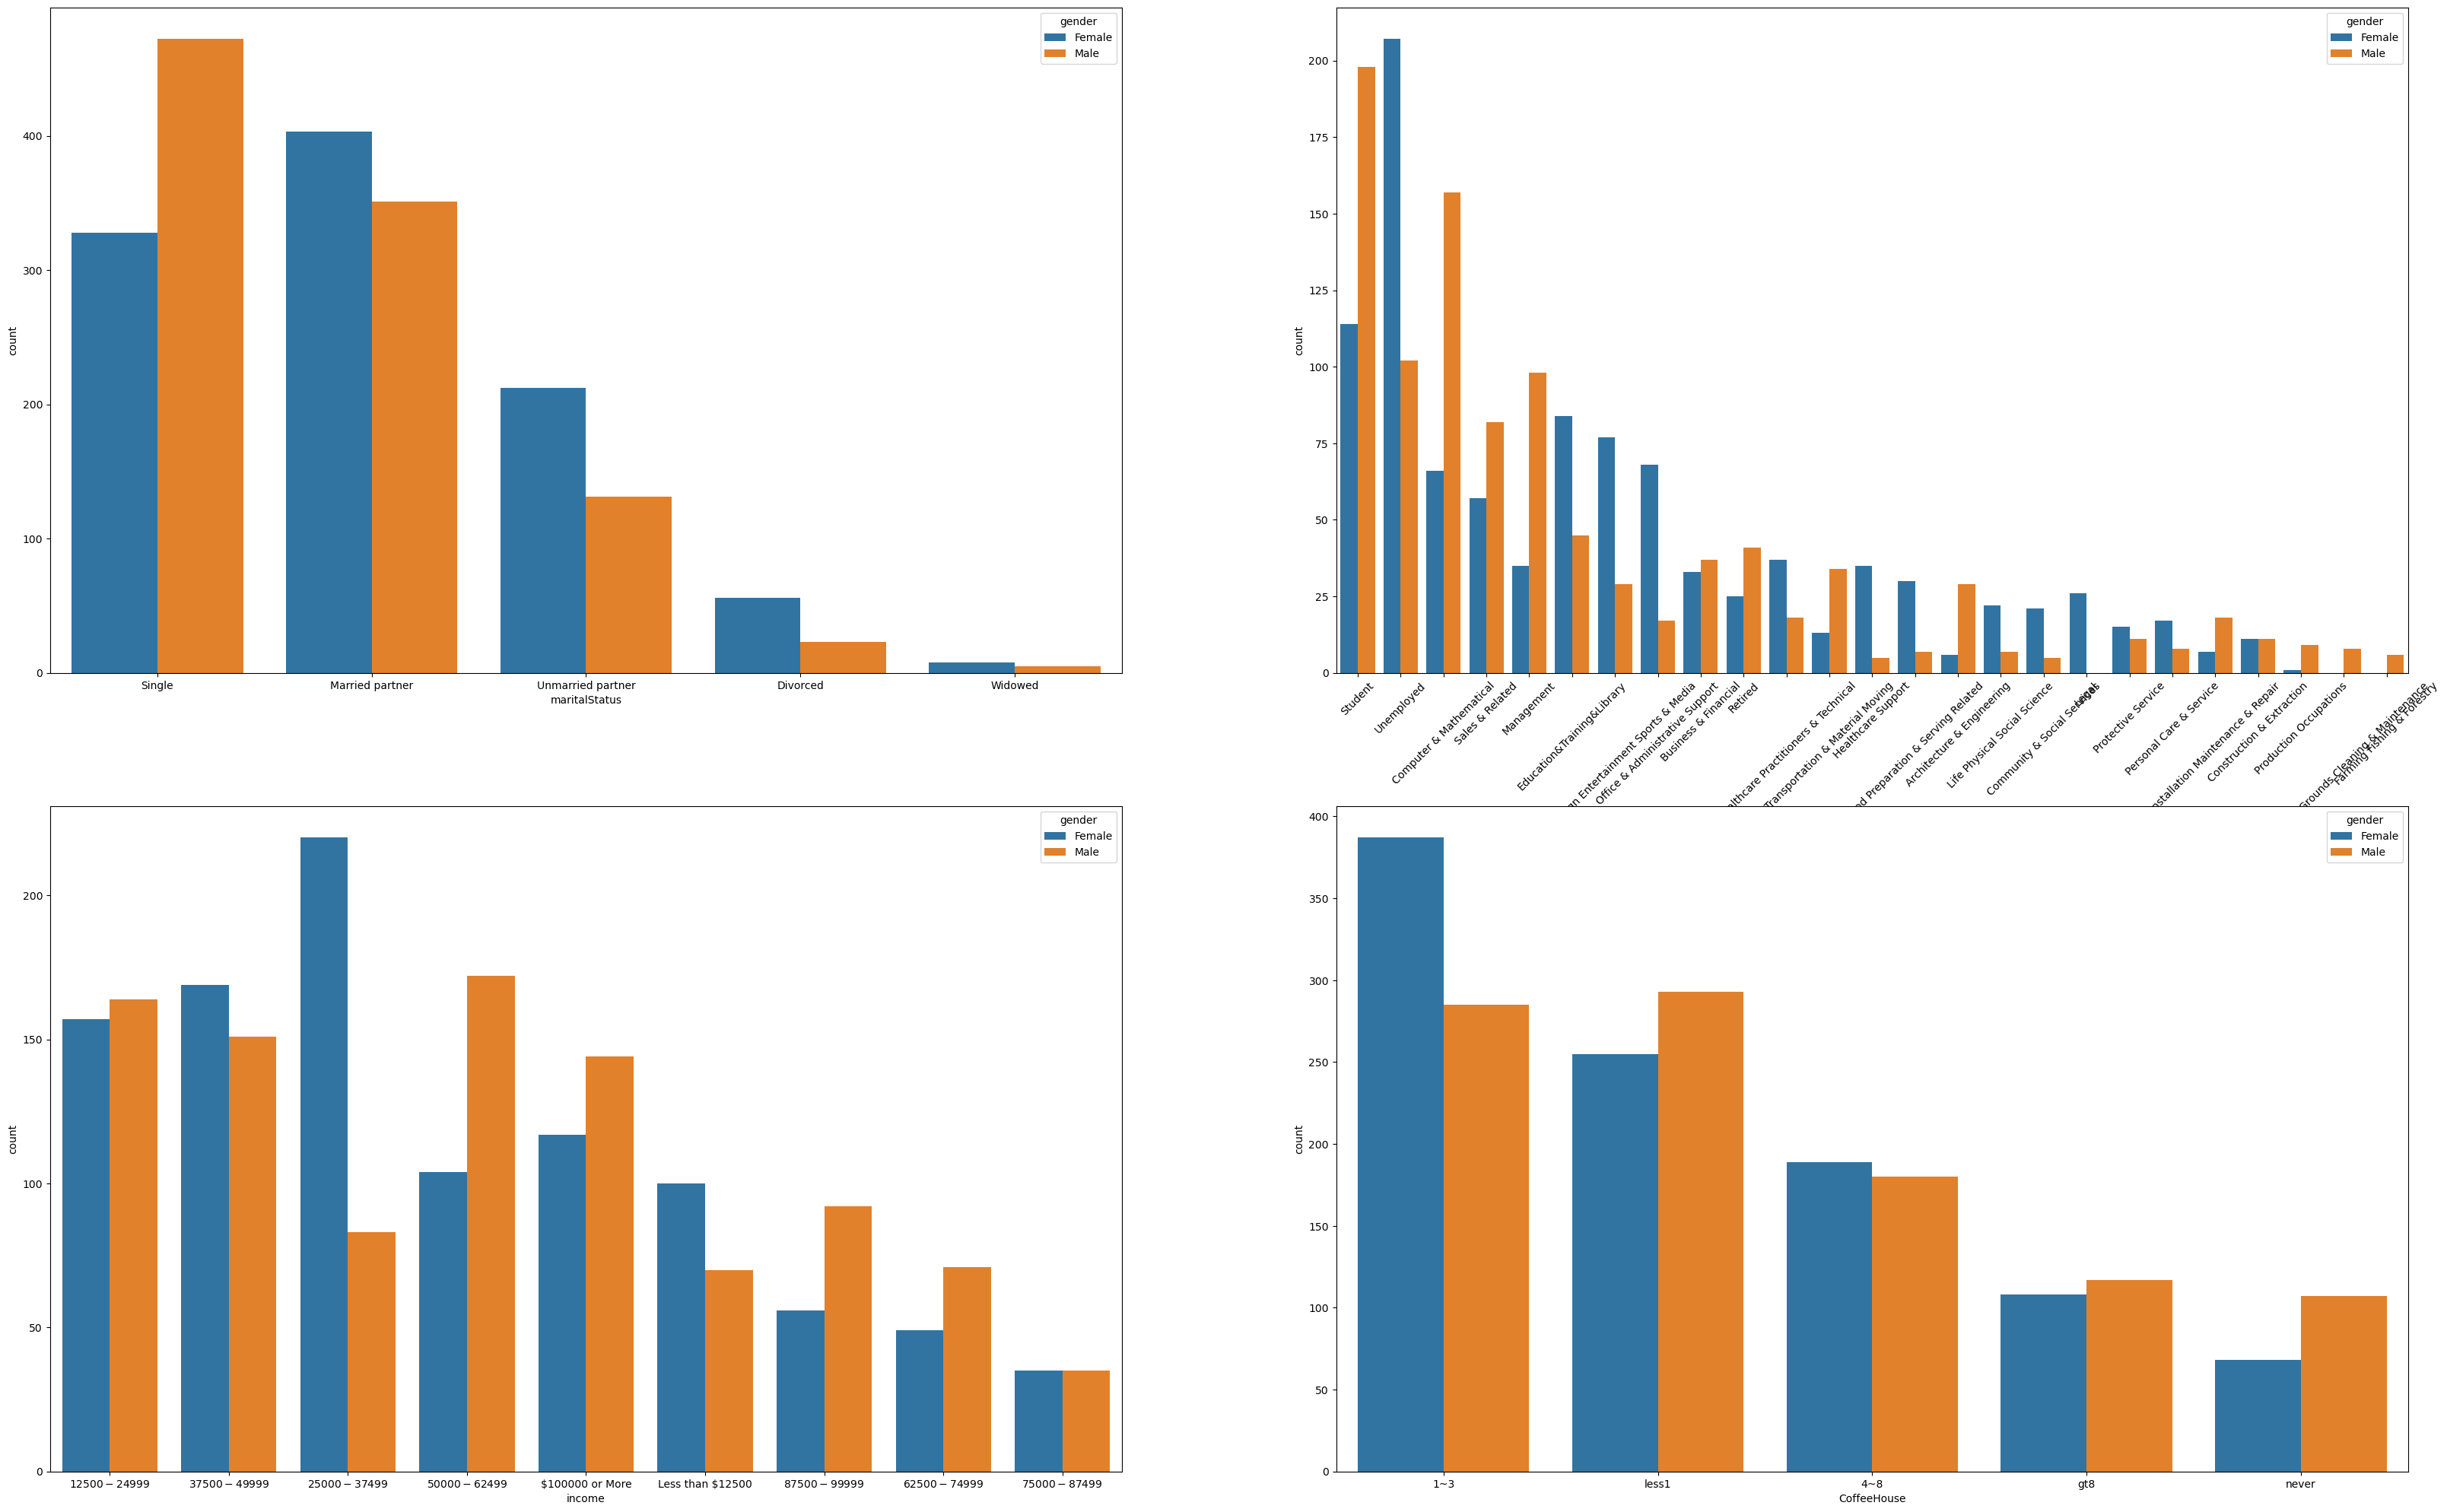

In [22]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(40, 25))
df_coffee = data.query('(coupon == "Coffee House") and (Y == 1)')
sns.countplot(df_coffee, x='maritalStatus', hue='gender', ax=axes[0][0], order = df_coffee['maritalStatus'].value_counts().index)
axes[0][1].tick_params(axis='x', rotation=45)
sns.countplot(df_coffee, x='occupation', hue='gender', ax=axes[0][1], order = df_coffee['occupation'].value_counts().index)
sns.countplot(df_coffee, x='income', hue='gender', ax=axes[1][0], order = df_coffee['income'].value_counts().index)
sns.countplot(df_coffee, x='CoffeeHouse', hue='gender', ax=axes[1][1], order = df_coffee['CoffeeHouse'].value_counts().index)

### Findings
```
    Single or student men drink proportionately accept more coupons than single or student women.
    Women who are unemployed or income between 25-38k or visit coffee house 1 to 3 times, accept
        more coupons than men of similar category

    The gender needs to be paired with other categorical attributes to hypothesize the difference
    between coupon acceptance by gender.

```

### Analysis
```
    Based on the past observations, 
        income, maritalStatus and age categories where plotted by time 
        sorted by 10AM

```

<Axes: xlabel='time', ylabel='income-maritalStatus-age'>

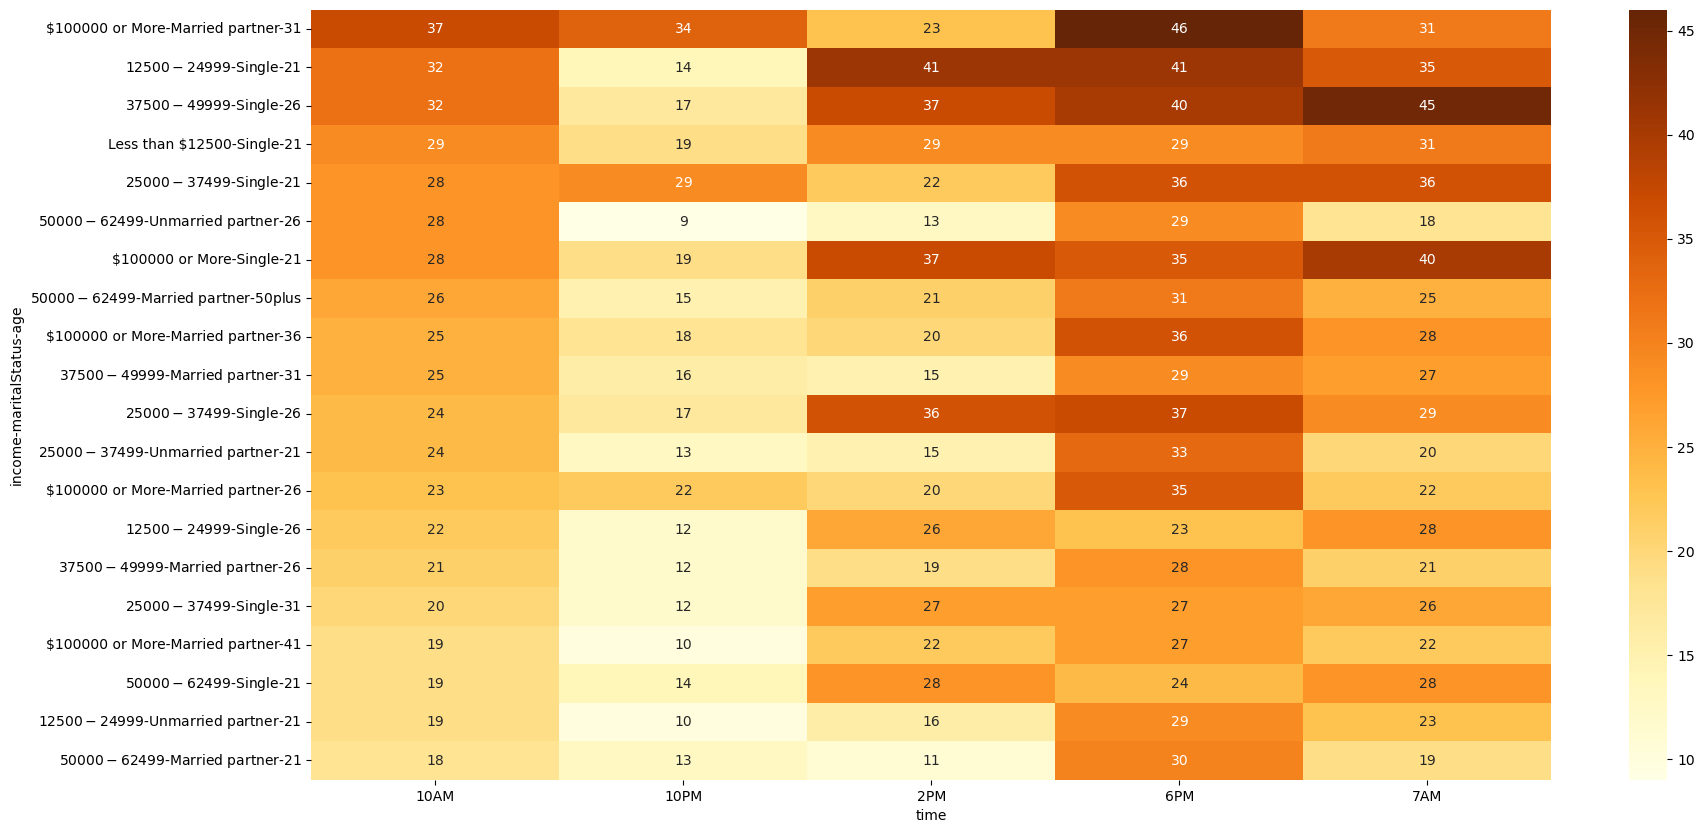

In [23]:

result = pd.pivot_table(data=data, index=['income','maritalStatus', 'age'], columns='time',values='Y',aggfunc=np.sum, fill_value=0)
result = result.reindex(result['10AM'].sort_values(ascending=False).index)

plt.figure(figsize=(20, 10))
sns.heatmap(result.head(20), annot=True, cmap = 'YlOrBr')

### Findings
```
   The heat map shows the key category pairings (top 2) by time (10AM, 7AM), status (married, single),
   income ( <= 50000), visits (<=3) and age (<=26) to have influence over coupon acceptance.

   We can compute the % propotions to gain final insights on coupon acceptance by CoffeHouse type.

```

In [24]:
total_coupons = df_coffee.shape[0]
age_coupons = df_coffee.query('age in ["21", "26"]').shape[0]
income_coupons = df_coffee.query('income in ["$12500 - $24999","$12500 - $24999", "$37500 - $49999" ]').shape[0]
time_coupons = df_coffee.query('time in ["10AM", "7AM"]').shape[0]
visit_coupons = df_coffee.query('CoffeeHouse in ["1~3", "less1"]').shape[0]
status_coupons = df_coffee.query('maritalStatus in ["Single", "Married partner"]').shape[0]

print(f'Total coffee house coupons accepted:            {total_coupons}')
print(f'Coupons accepted by income <=50k :        {income_coupons}   Prop: {100*(income_coupons/total_coupons):.1f}')
print(f'Coupons accepted by time <=10AM :         {time_coupons}   Prop: {100*(time_coupons/total_coupons):.1f}')
print(f'Coupons accepted by income <=50k :        {income_coupons}   Prop: {100*(income_coupons/total_coupons):.1f}')
print(f'Coupons accepted by time <=10AM :         {time_coupons}   Prop: {100*(time_coupons/total_coupons):.1f}')
print(f'Coupons accepted by visits <=3 :          {visit_coupons}   Prop: {100*(visit_coupons/total_coupons):.1f}')
print(f'Coupons accepted by married, single :     {status_coupons}   Prop: {100*(status_coupons/total_coupons):.1f}')


Total coffee house coupons accepted:            1989
Coupons accepted by income <=50k :        641   Prop: 32.2
Coupons accepted by time <=10AM :         982   Prop: 49.4
Coupons accepted by income <=50k :        641   Prop: 32.2
Coupons accepted by time <=10AM :         982   Prop: 49.4
Coupons accepted by visits <=3 :          1220   Prop: 61.3
Coupons accepted by married, single :     1554   Prop: 78.1


### Findings
```
    Based on the analysis, the top 2 category influencing coupon acceptance for Coffee House is married and single people.  Since that is very broad category to hypothesis, we consider the next two propotions.

        : People who visit coffeehouse fewer than 3 or less, accept about 61% proportion of coupons. 
            We can hypothesize that coupon motivates the visit than the need for coffee.
        : Coupons delivered by 10:00AM is accepted 49% proportionately. We can hypothesize
            the time after breakfast and between to be ideal to trigger coffee break.

```

### Analysis
```
    To analyze the least coffee house coupon acceptance, countplot for similar categories ( education, income, visits, marital status) is plotted.
```

<Axes: xlabel='occupation', ylabel='count'>

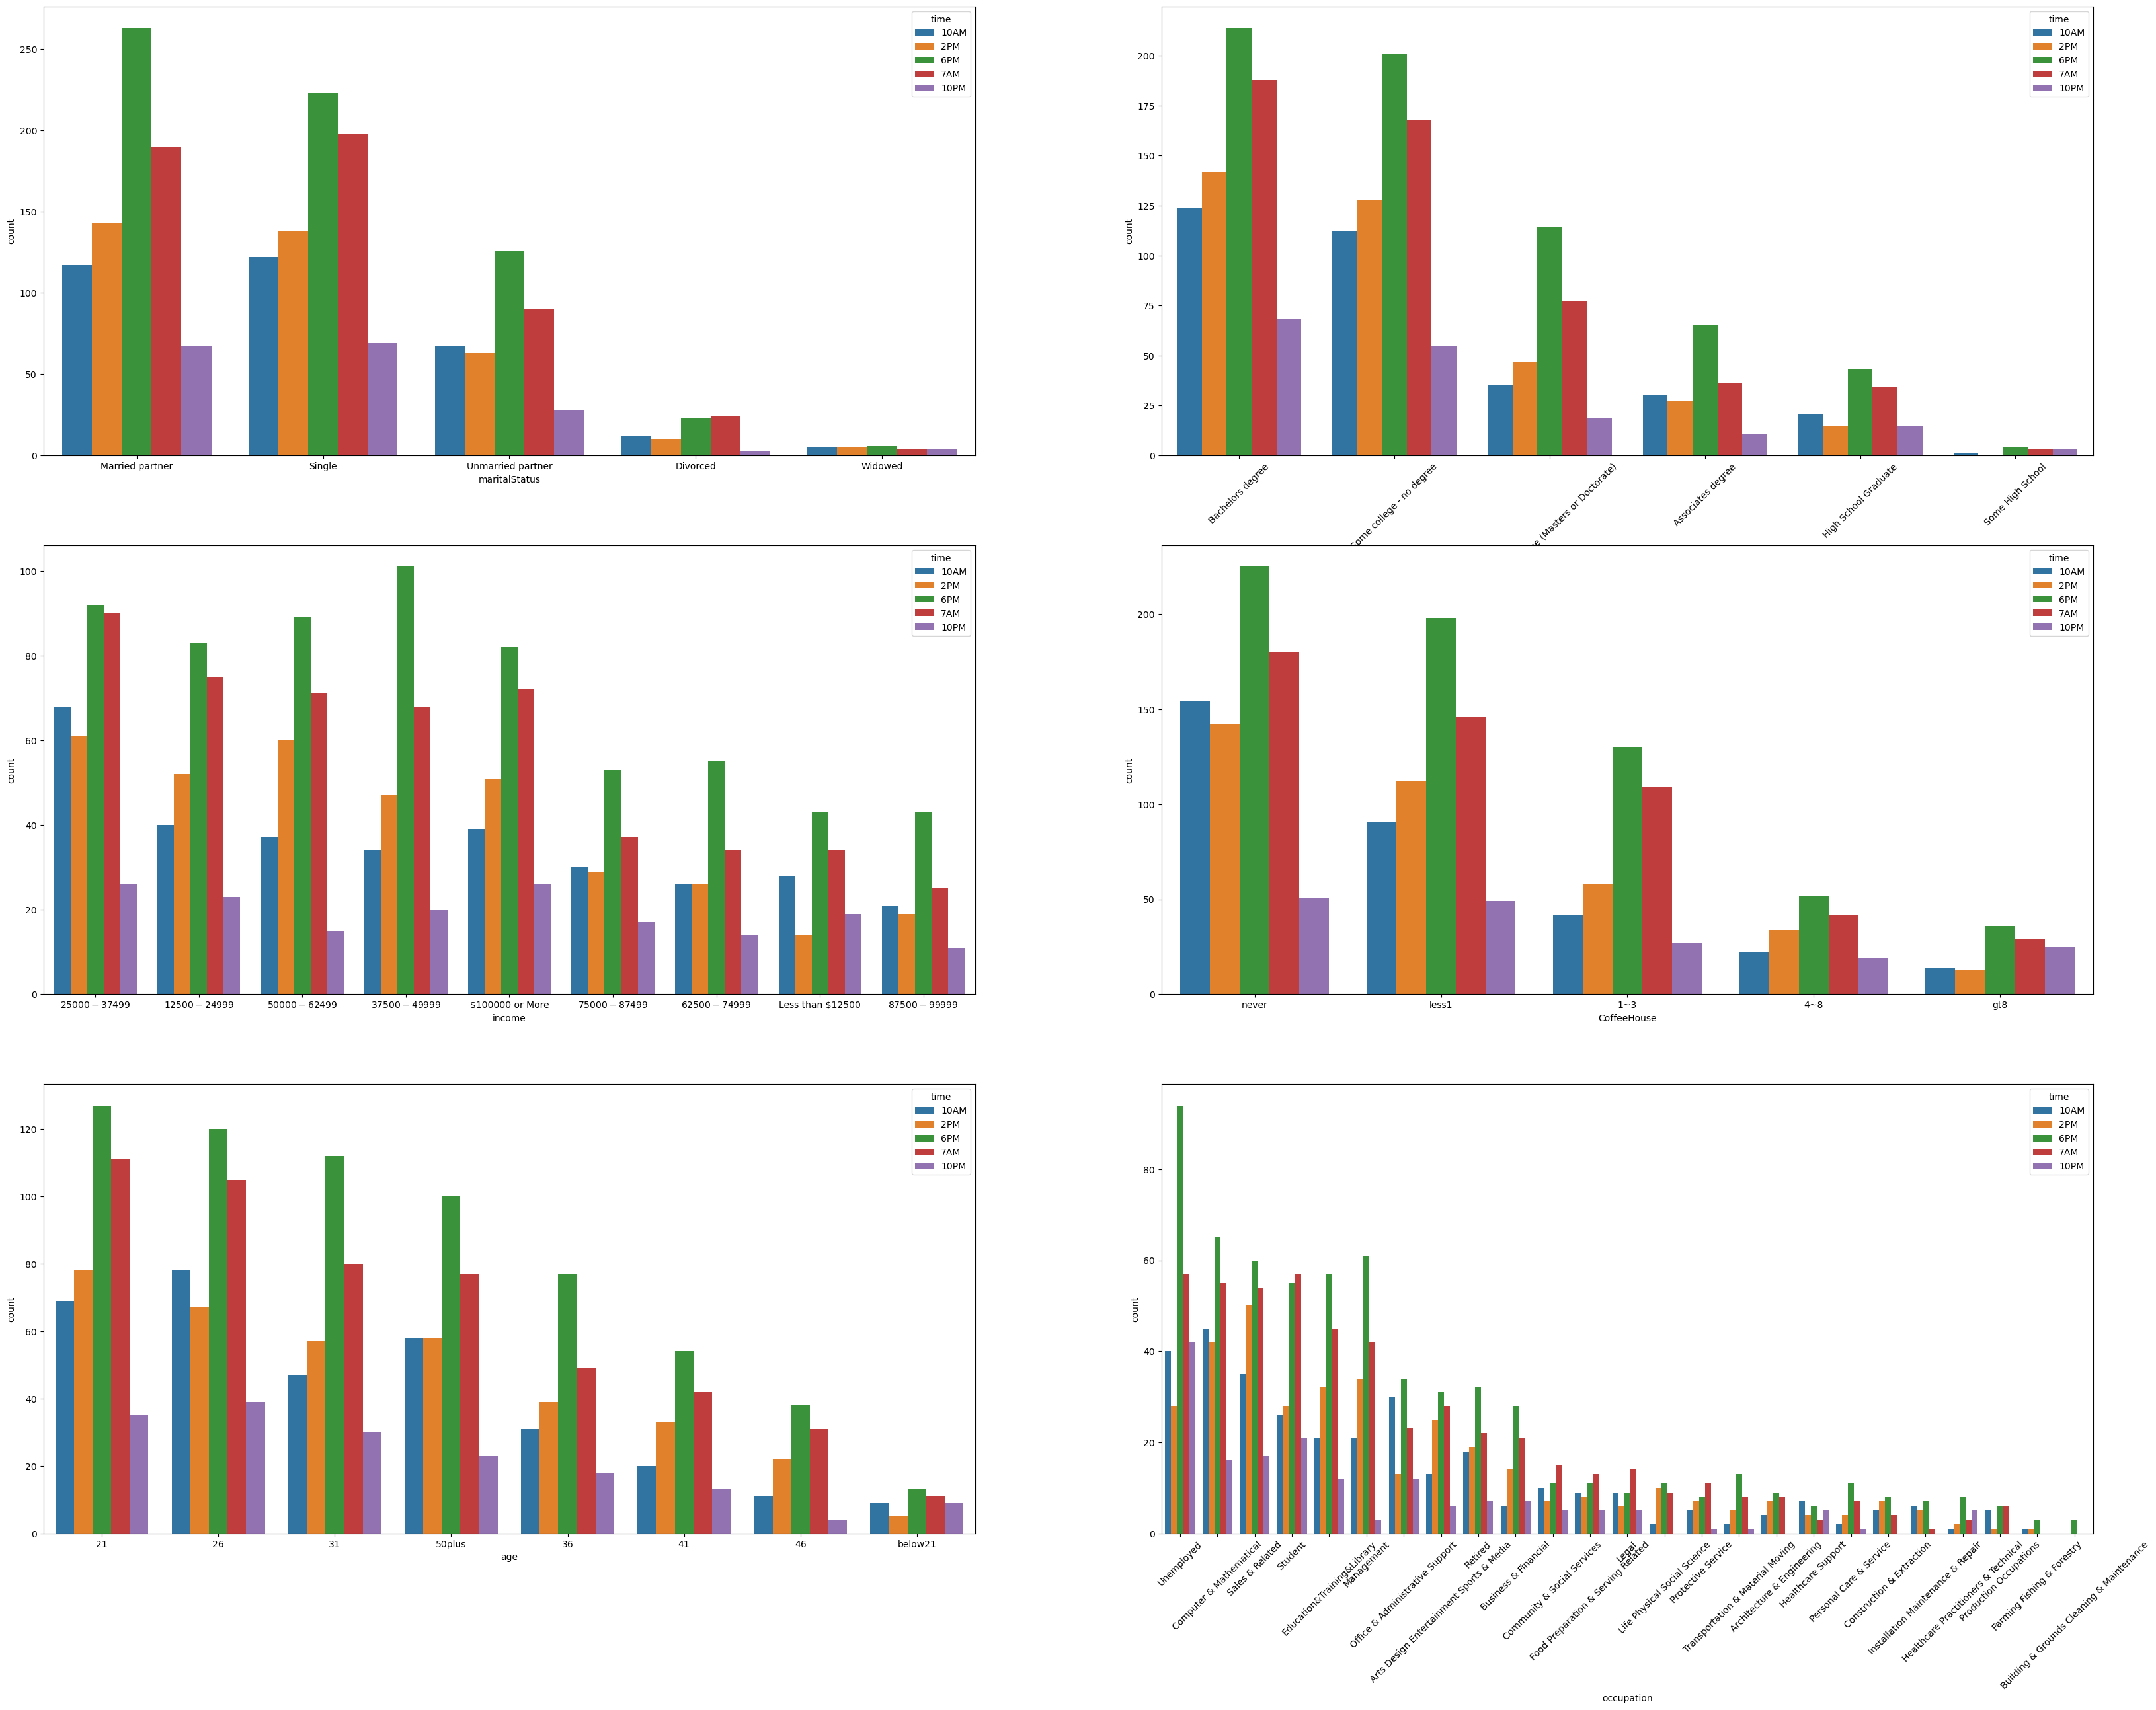

In [25]:
fig,axes = plt.subplots(nrows=3, ncols=2, figsize=(40, 30))

df_ignore = data.query('(coupon == "Coffee House") and (Y == 0)')
sns.countplot(df_ignore, x='maritalStatus', hue='time', ax=axes[0][0], \
              order = df_ignore['maritalStatus'].value_counts().index)
axes[0][1].tick_params(axis='x', rotation=45)
sns.countplot(df_ignore, x='education', hue='time', ax=axes[0][1], \
              order = df_ignore['education'].value_counts().index)
sns.countplot(df_ignore, x='income', hue='time', ax=axes[1][0], \
              order = df_ignore['income'].value_counts().index)
sns.countplot(df_ignore, x='CoffeeHouse', hue='time', ax=axes[1][1],\
               order = df_ignore['CoffeeHouse'].value_counts().index)
sns.countplot(df_ignore, x='age', hue='time', ax=axes[2][0],\
               order = df_ignore['age'].value_counts().index)
axes[2][1].tick_params(axis='x', rotation=45)
sns.countplot(df_ignore, x='occupation', hue='time', ax=axes[2][1],\
               order = df_ignore['occupation'].value_counts().index)

### Findings
```
    Pretty interesting to see the same categories rejected Coffee House coupons as well

        : People who never visit coffeehouse rejected the coupons, as there was no need to use it.
        : Rest of catgories are similar to 'coupon accepting' categories
```

### Conclusion
```
    Analysis was performed on CoffeeHouse coupon acceptance by drivers in proportion to the top 2 categories of user and context attributes.

    It provided insights of subgroups that acceptanced coupons at a higher proportion.

    But when peeking at the rejection proportion, I found them to be similiar categories as well.It highlights that heurisitics based sectioning of the drivers market segment, is a coin toss between accepting or rejecting coupons.

    Other than the obvious (never visiting or income), the rejection or acceptance of coupons by top 2 pairings of user or category attributes for "CoffeeHouse" coupons does not show any influencing factor.

    So the next steps would be to perform ML modeling on the cleaned up data, with further feature engineering on the data, to predict the market segments of coupon acceptance or rejection, more precisely.

```